In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import re

In [4]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import re

# Initial URL for scraping data
url = 'https://www.estesparkweather.net/archive_reports.php?date=202005'

# Fetch the page content
page = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

# Find all tables on the page
table = soup.find_all('table')

# Extract data from the table
raw_data = [row.text.splitlines() for row in table]

# Trim unnecessary parts of raw data
raw_data = raw_data[:-9]

# Process the data to clean it up
for i in range(len(raw_data)):
    raw_data[i] = raw_data[i][2:len(raw_data[i]):3]

# Generate a list of dates from 1/1/2009 to 08/05/2020
Dates_r = pd.date_range(start='1/1/2009', end='08/05/2020', freq='ME')
dates = [str(i)[:4] + str(i)[5:7] for i in Dates_r]

print(dates[0:5])

# Initialize lists to store data
df_list = []
index = []

# Loop through each date to scrape data for that month
for k in range(len(dates)):
    url = "https://www.estesparkweather.net/archive_reports.php?date="
    url += dates[k]

    # Fetch the page content for the specific date
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find_all('table')

    # Extract data from the table
    raw_data = [row.text.splitlines() for row in table]
    raw_data = raw_data[:-9]

    for i in range(len(raw_data)):
        raw_data[i] = raw_data[i][2:len(raw_data[i]):3]

    # Clean and format the data
    for i in range(len(raw_data)):
        c = ['.'.join(re.findall(r"\d+", str(raw_data[i][j].split()[:5]))) for j in range(len(raw_data[i]))]
        df_list.append(c)
        index.append(dates[k] + c[0])

# Filter index for valid entries
f_index = [index[i] for i in range(len(index)) if len(index[i]) > 6]

# Extract final data
data = [df_list[i][1:] for i in range(len(df_list)) if len(df_list[i][1:]) == 19]

# Convert final index to datetime format
final_index = [datetime.strptime(str(f_index[i]), '%Y%m%d').strftime('%Y-%m-%d') for i in range(len(f_index))]

# Create DataFrame and display the table
df = pd.DataFrame(data, index=final_index)

# Define new column names
new_column_names = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 
                     'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']

# Ensure the number of new column names matches the number of columns in the DataFrame
if len(new_column_names) == len(df.columns):
    df.columns = new_column_names
else:
    print("The number of new column names does not match the number of columns in the DataFrame.")

# Display the DataFrame with new column names
print(df)


['200901', '200902', '200903', '200904', '200905']
           Average temperature Average humidity Average dewpoint  \
2009-01-01                37.8               35             12.7   
2009-01-02                43.2               32             14.7   
2009-01-03                25.7               60             12.7   
2009-01-04                 9.3               67              0.1   
2009-01-05                23.5               30              5.3   
...                        ...              ...              ...   
2020-07-27                61.7               64             47.4   
2020-07-28                60.5               61             45.3   
2020-07-29                67.7               37             38.0   
2020-07-30                59.4               67             46.4   
2020-07-31                58.5               70             46.4   

           Average barometer Average windspeed Average gustspeed  \
2009-01-01              29.7              26.4              36.8

In [5]:
df.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute\t,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
2009-01-01,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,0.00,40.1,34.5,44,27,29.762,29.596,41.4,59,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,0.00,52.8,37.5,43,16,29.669,29.268,35.7,51,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,0.00,41.2,6.7,89,35,30.232,29.260,25.3,38,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,0.00,19.4,0.0,79,35,30.566,30.227,12.7,20,32.0
2009-01-05,23.5,30,5.3,29.9,16.7,23.1,265,0.00,0.00,0.00,30.3,15.1,56,13,30.233,29.568,38.0,53,32.0


In [9]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import re

# Your previous data extraction code here...

# Create DataFrame and display the table
df = pd.DataFrame(data, index=final_index)

# Define new column names
new_column_names = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Average gustspeed', 'Average direction', 'Rainfall for month', 'Rainfall for year', 'Maximum rain per minute', 
                     'Maximum temperature', 'Minimum temperature', 'Maximum humidity', 'Minimum humidity', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed', 'Maximum heat index']
df.columns = new_column_names

# Save the DataFrame to a CSV file
csv_filename = 'weather_data.csv'
df.to_csv(csv_filename, index=True)  # Set index=True to include the DataFrame index in the CSV

print(f"Data saved to {csv_filename}")


Data saved to weather_data.csv


In [13]:
df.columns

Index(['Average temperature', 'Average humidity', 'Average dewpoint',
       'Average barometer', 'Average windspeed', 'Average gustspeed',
       'Average direction', 'Rainfall for month', 'Rainfall for year',
       'Maximum rain per minute', 'Maximum temperature', 'Minimum temperature',
       'Maximum humidity', 'Minimum humidity', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed', 'Maximum gust speed',
       'Maximum heat index'],
      dtype='object')

2009-01-01    0.0
2009-01-02    0.0
2009-01-03    0.0
2009-01-04    0.0
2009-01-05    0.0
Name: Rainfall for month, dtype: float64
1      32.35
2      47.59
3      76.11
4     165.53
5     343.69
6     187.40
7     383.50
8     190.24
9      81.06
10    153.48
11     63.86
12     36.94
Name: Rainfall for month, dtype: float64


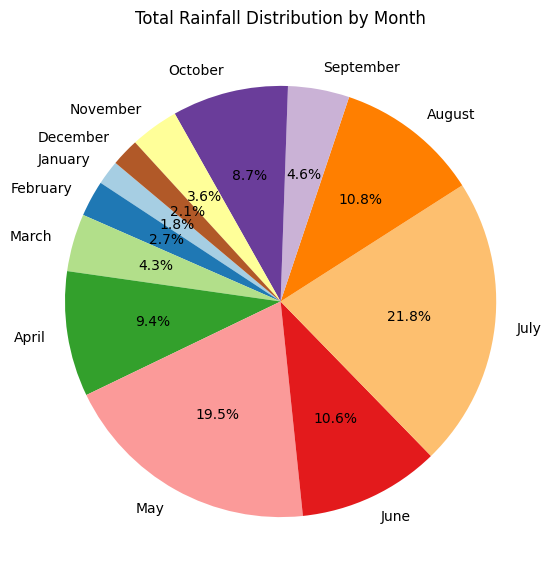

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Example DataFrame setup (assuming df is already defined and has a datetime index)
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Convert 'Rainfall for month' to numeric, forcing errors to NaN
df['Rainfall for month'] = pd.to_numeric(df['Rainfall for month'], errors='coerce')

# Check for any non-numeric values or missing data
print(df['Rainfall for month'].head())

# Aggregate data by month
monthly_data = df.groupby(df.index.month)['Rainfall for month'].sum()

# Print aggregated data to verify
print(monthly_data)

# Convert month numbers to month names for labels
monthly_data.index = [datetime(2020, month, 1).strftime('%B') for month in monthly_data.index]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(monthly_data, labels=monthly_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(monthly_data))))
plt.title('Total Rainfall Distribution by Month')
plt.show()


2009-01-01    37.8
2009-01-02    43.2
2009-01-03    25.7
2009-01-04     9.3
2009-01-05    23.5
Name: Average temperature, dtype: float64
1     29.651762
2     28.721782
3     36.138679
4     40.244860
5     48.013353
6     59.969748
7     63.764134
8     61.612903
9     56.098587
10    44.297361
11    36.424458
12    29.123675
Name: Average temperature, dtype: float64


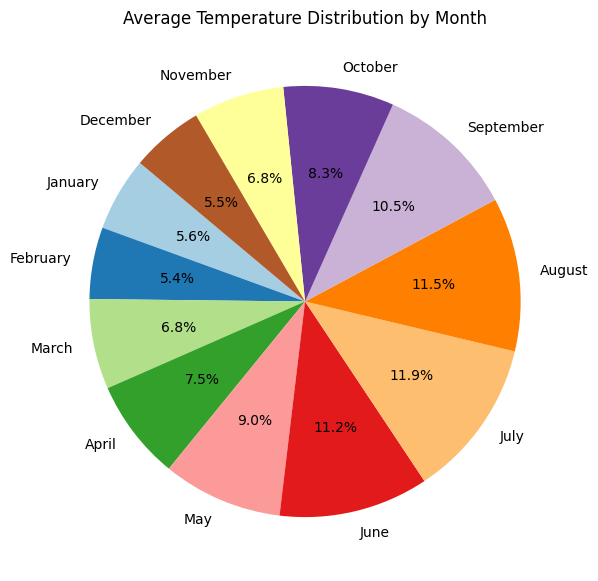

In [33]:
df.index = pd.to_datetime(df.index)

# Convert 'Average temperature' to numeric, forcing errors to NaN
df['Average temperature'] = pd.to_numeric(df['Average temperature'], errors='coerce')

# Check for any non-numeric values or missing data
print(df['Average temperature'].head())

# Aggregate data by month to get the average temperature
monthly_data = df.groupby(df.index.month)['Average temperature'].mean()

# Print aggregated data to verify
print(monthly_data)

# Convert month numbers to month names for labels
monthly_data.index = [datetime(2020, month, 1).strftime('%B') for month in monthly_data.index]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(monthly_data, labels=monthly_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(monthly_data))))
plt.title('Average Temperature Distribution by Month')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3905 entries, 2009-01-01 to 2020-07-31
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average temperature      3905 non-null   float64
 1   Average humidity         3905 non-null   object 
 2   Average dewpoint         3905 non-null   object 
 3   Average barometer        3905 non-null   object 
 4   Average windspeed        3905 non-null   object 
 5   Average gustspeed        3905 non-null   object 
 6   Average direction        3905 non-null   object 
 7   Rainfall for month       3905 non-null   float64
 8   Rainfall for year        3905 non-null   object 
 9   Maximum rain per minute  3905 non-null   object 
 10  Maximum temperature      3905 non-null   object 
 11  Minimum temperature      3905 non-null   object 
 12  Maximum humidity         3905 non-null   object 
 13  Minimum humidity         3905 non-null   object 
 14  Maximu

In [35]:
df = df.apply(pd.to_numeric, errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3905 entries, 2009-01-01 to 2020-07-31
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average temperature      3905 non-null   float64
 1   Average humidity         3905 non-null   int64  
 2   Average dewpoint         3905 non-null   float64
 3   Average barometer        3905 non-null   float64
 4   Average windspeed        3905 non-null   float64
 5   Average gustspeed        3905 non-null   float64
 6   Average direction        3905 non-null   int64  
 7   Rainfall for month       3905 non-null   float64
 8   Rainfall for year        3905 non-null   float64
 9   Maximum rain per minute  3905 non-null   float64
 10  Maximum temperature      3905 non-null   float64
 11  Minimum temperature      3905 non-null   float64
 12  Maximum humidity         3905 non-null   int64  
 13  Minimum humidity         3905 non-null   int64  
 14  Maximu

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# 1. Handling Missing Values
# Impute missing values with mean (or median, mode as needed)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 2. Data Scaling/Normalization
# Standard Scaling (Z-score normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

# Alternatively, Min-Max Scaling (0-1 normalization)
# min_max_scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_imputed), columns=df.columns)

# 3. Encoding Categorical Variables (if any)
# This step is not applicable in this example as there are no categorical variables

# 4. Removing Outliers (example: Z-score method)
# Calculate Z-scores
from scipy import stats
z_scores = np.abs(stats.zscore(df_scaled))
df_no_outliers = df_scaled[(z_scores < 3).all(axis=1)]

# 5. Feature Engineering (example: create a new feature)
df_no_outliers['Temperature_Humidity_Ratio'] = df_no_outliers['Average temperature'] / df_no_outliers['Average humidity']

# 6. Data Transformation (if needed)
# Example: log transformation (often used for skewed data)
df_transformed = df_no_outliers.copy()
df_transformed['Rainfall for month'] = np.log1p(df_transformed['Rainfall for month'])  # log(x+1)

# Display the DataFrame after preprocessing
print("\nAfter preprocessing:")
print(df_transformed)


After preprocessing:
      Average temperature  Average humidity  Average dewpoint  \
1               -0.099639         -0.968403         -0.651241   
2               -1.248768          0.637475         -0.796468   
3               -2.325666          1.038945         -1.711397   
4               -1.393230         -1.083109         -1.333808   
5               -1.307866         -0.394875         -1.384637   
...                   ...               ...               ...   
3900             1.115155          0.866886          1.723218   
3901             1.036358          0.694828          1.570730   
3902             1.509142         -0.681639          1.040652   
3903             0.964127          1.038945          1.650605   
3904             0.905029          1.211003          1.650605   

      Average barometer  Average windspeed  Average gustspeed  \
1             -1.523741           1.751419           0.566274   
2             -0.724680           0.632287           0.155239   
3 

C:\Users\RAHUL REDDY\AppData\Local\Temp\ipykernel_16024\1051279487.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Temperature_Humidity_Ratio'] = df_no_outliers['Average temperature'] / df_no_outliers['Average humidity']


In [46]:
sel_col=['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Maximum rain per minute',  'Maximum heat index']
ds=df[sel_col]

In [47]:
ds.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Maximum rain per minute,Maximum heat index
2009-01-01,37.8,35,12.7,29.7,26.4,0.0,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,0.0,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,0.0,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,0.0,32.0
2009-01-05,23.5,30,5.3,29.9,16.7,0.0,32.0


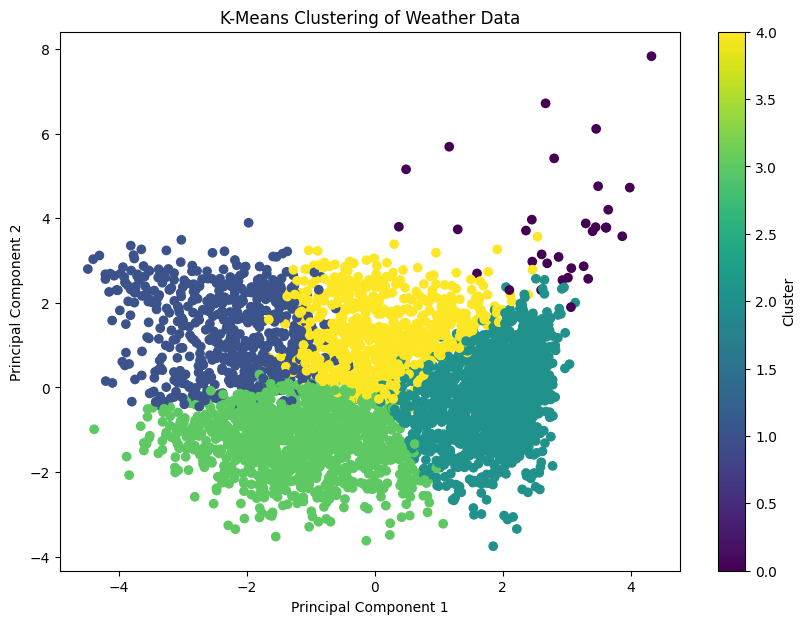


Cluster Summary:
         Average temperature  Average humidity  Average dewpoint  \
Cluster                                                            
0                  56.145455         66.303030         43.175758   
1                  22.144714         59.958406         10.359965   
2                  60.082843         46.919468         35.849720   
3                  39.456773         34.772575         12.027843   
4                  40.242176         67.843517         28.978689   

         Average barometer  Average windspeed  Maximum rain per minute  \
Cluster                                                                  
0                29.827273           3.103030                 0.111515   
1                30.214905           3.711265                 0.004125   
2                29.755672           4.018557                 0.003978   
3                29.880853          10.150585                 0.000861   
4                29.865723           3.518629                

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample DataFrame setup (assuming ds is already defined and has the required columns)
# Convert columns to numeric, forcing errors to NaN
for col in ds.columns:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Define selected columns
sel_col = ['Average temperature', 'Average humidity', 'Average dewpoint', 'Average barometer', 'Average windspeed', 'Maximum rain per minute', 'Maximum heat index']
ds = ds[sel_col]

# Handle missing values (e.g., fill with mean or median)
ds.fillna(ds.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

# Optional: Dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
ds_pca = pca.fit_transform(ds_scaled)

# Apply K-Means clustering
num_clusters = 5  # Adjust this based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(ds_scaled)

# Add the cluster labels to the DataFrame
ds['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(ds_pca[:, 0], ds_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Weather Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Analyze clusters to interpret weather conditions
# For each cluster, you can examine the centroid or the average feature values
cluster_summary = ds.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Example interpretation: Map clusters to weather conditions based on domain knowledge
# For demonstration purposes, you might manually assign labels based on cluster characteristics
weather_conditions = ['Rain', 'Cool', 'Extreme Hot', 'Normal', 'Sunny']
ds['Predicted Weather'] = ds['Cluster'].map(lambda x: weather_conditions[x])

# Display the DataFrame with predicted weather conditions
print("\nData with Predictions:")
print(ds)


In [59]:
ds.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Maximum rain per minute,Maximum heat index,Cluster,Predicted Weather
2009-01-01,37.8,35,12.7,29.7,26.4,0.0,40.1,3,Normal
2009-01-02,43.2,32,14.7,29.5,12.8,0.0,52.8,3,Normal
2009-01-03,25.7,60,12.7,29.7,8.3,0.0,41.2,3,Normal
2009-01-04,9.3,67,0.1,30.4,2.9,0.0,32.0,1,Cool
2009-01-05,23.5,30,5.3,29.9,16.7,0.0,32.0,3,Normal


In [57]:
csv_filename = 'sample.csv'
ds.to_csv(csv_filename, index=True)  # Set index=True to include the DataFrame index in the CSV

print(f"Data saved to {csv_filename}")

Data saved to sample.csv


In [68]:
X=ds[sel_col]
X.head()

,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Maximum rain per minute,Maximum heat index
2009-01-01,37.8,35,12.7,29.7,26.4,0.0,40.1
2009-01-02,43.2,32,14.7,29.5,12.8,0.0,52.8
2009-01-03,25.7,60,12.7,29.7,8.3,0.0,41.2
2009-01-04,9.3,67,0.1,30.4,2.9,0.0,32.0
2009-01-05,23.5,30,5.3,29.9,16.7,0.0,32.0


In [69]:
y=ds['Cluster']
y.head()

2009-01-01    3
2009-01-02    3
2009-01-03    3
2009-01-04    1
2009-01-05    3
Name: Cluster, dtype: int32

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is the target variable (0 to 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9603072983354674


In [ ]:
temperature = float(input("Average temperature"))
humidity = int(input("Average humidity"))
dew_point = float(input("Average dewpoint"))
barometer = float(input("Average barometer"))
wind = float(input("Average windspeed"))
rain= float(input("Maximum rain per minute"))
heat = float(input("Maximum heat index"))
model.predict(np.array([[temperature,humidity,dew_point,barometer,wind,rain,heat,barometer]]))

In [74]:
model.predict(np.array([[temperature,humidity,dew_point,wind,rain,heat,barometer]]))

C:\Users\RAHUL REDDY\Desktop\PVPWorkshop\pjt\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [77]:
import pickle

In [80]:
with open('final.pkl','wb') as f:
          pickle.dump(model,f)


In [81]:
pred_model=pickle.load(open('final.pkl','rb'))